# 전국 신규 민간 아파트 분양 가격 동향
## 소개
2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에 반양이되는지 확인해본 프로젝트
## 데이터셋
[공공데이터 포털](https://www.data.go.kr/data/15061057/fileData.do)
- 전국 평균 분양가격 (2013년 9월 ~ 2015년 8월)
- 주택도시보증공사 전국 평균 분양가격 (2015년 ~ 2019년 12월)
## 구현
### 1. 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

### 2. Data Load

In [4]:
import glob
glob.glob("data/*")

['data\\전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
 'data\\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv']

In [5]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949")
df_last = pd.read_csv("data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv", encoding="cp949")

print(f"2013~2018 데이터: {df_first.shape}\n2015~2021 데이터: {df_last.shape}")

2013~2018 데이터: (17, 22)
2015~2021 데이터: (6120, 5)


In [6]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [7]:
df_last.head()

,지역명,규모구분,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


`df_first`와 `df_last`의 데이터 형태가 다릅니다.  
**Tidy Data** 형식으로 변경해줘야합니다.

#### Tidy Data
Tidy Data란, 관측치가 행이고 변수가 열인 데이터로 데이터 분석에 용이한 데이터를 의미합니다.  
`df_first`의 경우 `wide form` 형태이고 `df_last`의 경우 `long form` 형태입니다.  
`lonog form`의 경우, 관측치가 행이고 변수가 열이기 때문에, tidy data라 할 수 있으며, `df_first`를 `long form` 형태로 변경해줘야합니다.

### 3. 데이터 요약하기

In [8]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     6120 non-null   object
 1   규모구분    6120 non-null   object
 2   연도      6120 non-null   int64 
 3   월       6120 non-null   int64 
 4   분양가격    5641 non-null   object
dtypes: int64(2), object(3)
memory usage: 239.2+ KB


### 4. 결측치 확인하기

In [10]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [11]:
df_last.isnull().sum()

지역명       0
규모구분      0
연도        0
월         0
분양가격    479
dtype: int64

In [12]:
# 결측치 비율
df_last.isnull().mean()*100

지역명     0.000000
규모구분    0.000000
연도      0.000000
월       0.000000
분양가격    7.826797
dtype: float64

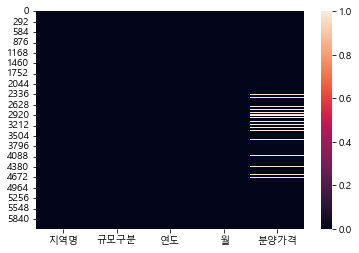

In [13]:
# 결측치를 시각화
_ = sns.heatmap(df_last.isnull())

### 5. 데이터 타입 변경

In [15]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격"], errors="coerce")
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 239.2+ KB


#### pd.melt로 형태 맞추기
`df_first`의 경우 `wide form` 형태이므로 `long form` 형태로 변경해줍니다.

In [31]:
df_first_melt = pd.melt(df_first, id_vars=["지역"])

In [32]:
df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [ ]:
df_first_melt.columns = ["지역명","기간", "평당분양가격"]
df_first_melt.head(2)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


`df_frist_melt`와 `df_last`의 컬럼을 맞춰줍니다.
##### 연도와 월 분리

In [36]:
def parse_year(date):
    return int(date.split("년")[0])
def parse_month(date):
    return int(date.split("년")[-1].replace("월", ""))

In [37]:
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)

In [38]:
df_first_melt.sample(5)

,지역명,기간,평당분양가격,연도,월
172,대구,2014년10월,8403,2014,10
59,세종,2014년3월,7814,2014,3
282,충북,2015년4월,6790,2015,4
7,경기,2013년12월,10855,2013,12
328,대전,2015년7월,8079,2015,7


### 6. 분석하기

#### 평당 분양가격 구하기
분양가격을 평당 기준으로 보기 위해 새로운 컬럼을 만듭니다.

In [16]:
df_last["평당분양가격"] = df_last["분양가격"]*3.3

In [17]:
df_last.sample(5)

,지역명,규모구분,연도,월,분양가격,평당분양가격
3634,전북,전용면적 102제곱미터초과,2019,4,2634.0,8692.2
3214,전남,전용면적 102제곱미터초과,2018,11,2502.0,8256.6
2779,충남,전용면적 102제곱미터초과,2018,6,2580.0,8514.0
5836,충남,전용면적 60제곱미터이하,2021,6,2806.0,9259.8
5471,대전,전용면적 60제곱미터이하,2021,2,3061.0,10101.3


#### 분양가격 요약

In [18]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
 5   평당분양가격  5625 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 287.0+ KB


In [19]:
df_last["분양가격"].describe()

count     5625.000000
mean      3459.317867
std       1411.776054
min       1868.000000
25%       2574.000000
50%       3067.000000
75%       3922.000000
max      13835.000000
Name: 분양가격, dtype: float64

#### 컬럼 정리하기
컬럼의 내용을 좀 더 직관적이고 간결하게 변환해줍니다.

In [22]:
df_last["규모구분"].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [23]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터|이하| ", "", regex=True)
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")

In [24]:
df_last.sample(5)

,지역명,규모구분,연도,월,분양가격,평당분양가격,전용면적
3411,경기,전용면적 60제곱미터이하,2019,2,4444.0,14665.2,60
4070,경남,모든면적,2019,9,2995.0,9883.5,모든면적
175,인천,모든면적,2015,12,3184.0,10507.2,모든면적
959,대구,전용면적 102제곱미터초과,2016,9,3045.0,10048.5,102~
5487,강원,전용면적 60제곱미터초과 85제곱미터이하,2021,2,3083.0,10173.9,60~85


#### 필요없는 컬럼 제거하기

In [25]:
df_last = df_last.drop(["규모구분", "분양가격"], axis=1)

In [26]:
df_last.sample(5)

,지역명,연도,월,평당분양가격,전용면적
611,부산,2016,5,9824.1,60
1021,서울,2016,10,21981.3,60
4561,충남,2020,3,7887.0,60
1884,경기,2017,8,13322.1,102~
4449,광주,2020,2,14223.0,102~


#### 컬럼 맞추기

In [39]:
df_first_melt.columns.to_list()

['지역명', '기간', '평당분양가격', '연도', '월']

In [40]:
df_last.columns.to_list()

['지역명', '연도', '월', '평당분양가격', '전용면적']

In [41]:
cols = ["지역명", "연도", "월", "평당분양가격"]

In [43]:
df_first_prepare = df_first_melt.loc[:, cols].copy()
df_last_prepare = df_last.loc[df_last["전용면적"]=="모든면적", cols].copy()

#### 데이터 합치기

In [44]:
df = pd.concat([df_first_prepare, df_last_prepare], axis=0)

In [45]:
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
6095,전북,2021,9,8715.3
6100,전남,2021,9,10487.4
6105,경북,2021,9,10345.5
6110,경남,2021,9,10873.5


### 7. 시각화

#### 수치데이터 히스토그램

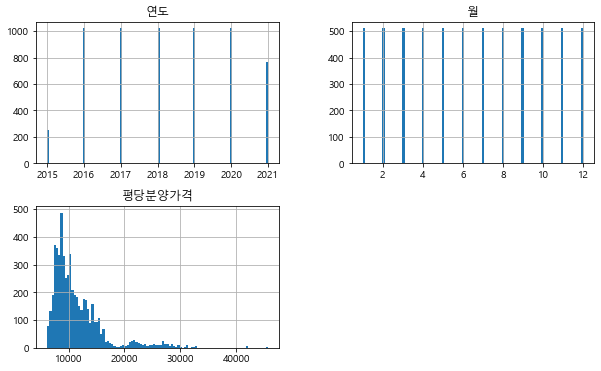

In [28]:
_ = df_last.hist(figsize=(10, 6), bins=100)

`bins` 옵션을 높게 설정하면, 해당 데이터의 수치형 데이터와 범주형 데이터를 찾는데 도움이 됩니다.

#### Pairplot

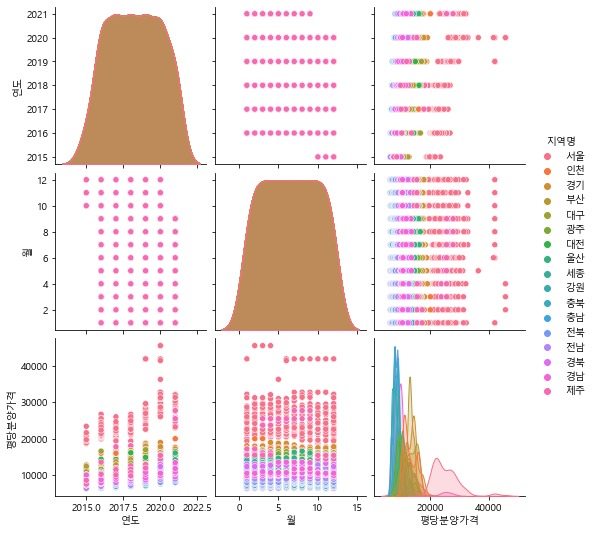

In [29]:
_ = sns.pairplot(data=df_last, hue="지역명")

특정 데이터만 보고 싶은 경우, `isin` 메서드를 사용할 수 있습니다.

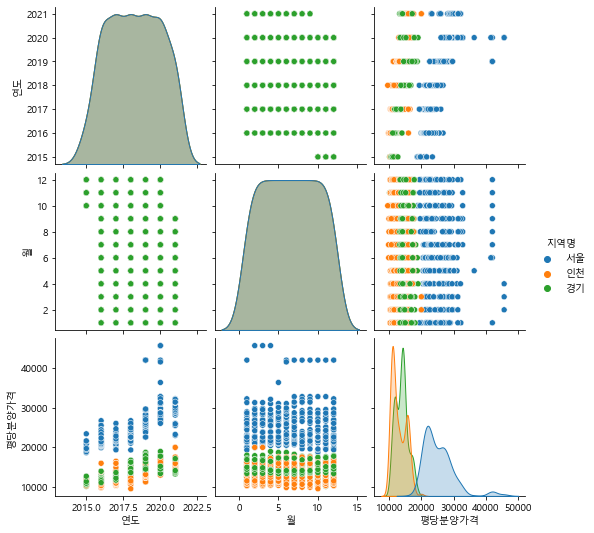

In [30]:
_ = sns.pairplot(data=df_last[df_last["지역명"].isin(["서울", "경기", "인천"])], hue="지역명")

#### 연도별 평당분양가격

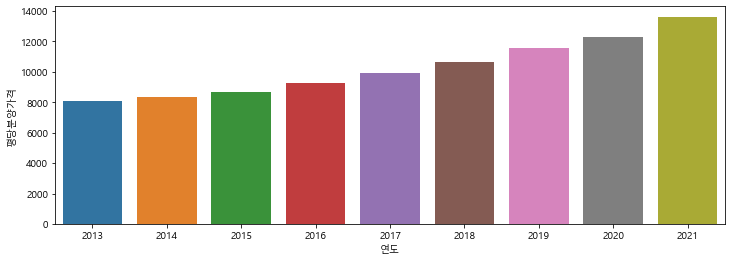

In [49]:
plt.figure(figsize=(12, 4))
_ = sns.barplot(data=df, x="연도", y="평당분양가격", ci=None)

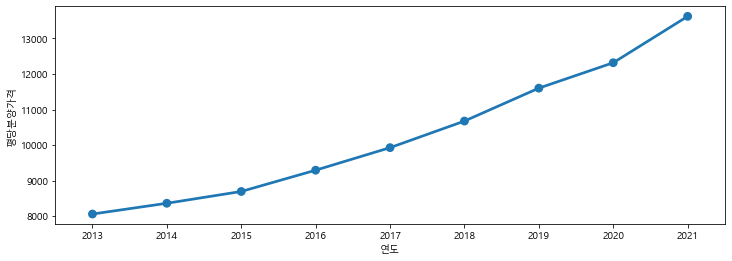

In [50]:
plt.figure(figsize=(12, 4))
_ = sns.pointplot(data=df, x="연도", y="평당분양가격", ci=None)

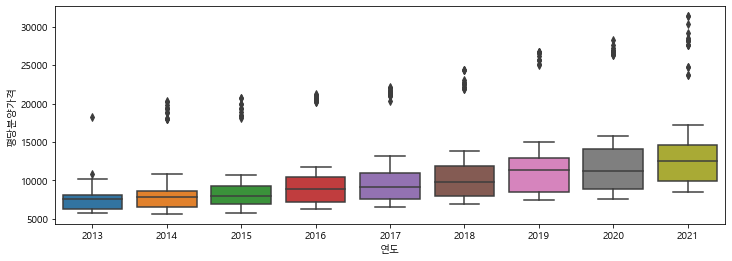

In [51]:
plt.figure(figsize=(12, 4))
_ = sns.boxplot(data=df, x="연도", y="평당분양가격")

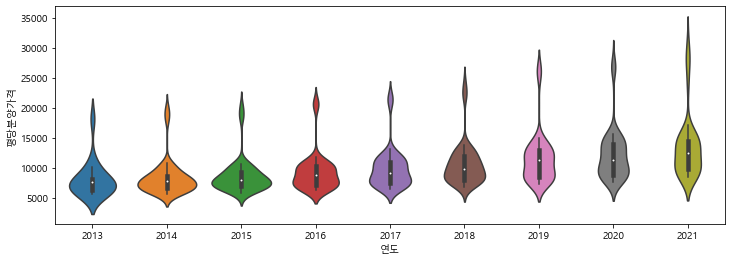

In [53]:
plt.figure(figsize=(12, 4))
_ = sns.violinplot(data=df, x="연도", y="평당분양가격")

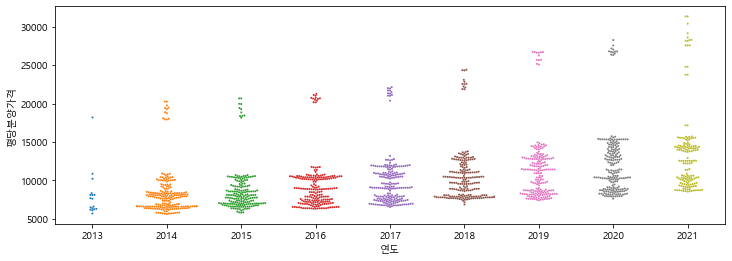

In [54]:
plt.figure(figsize=(12, 4))
_ = sns.swarmplot(data=df, x="연도", y="평당분양가격", size=2)


#### 지역별 평당분양 가격

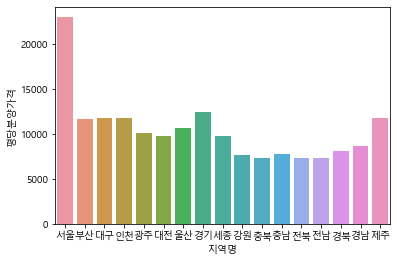

In [56]:
_ = sns.barplot(data=df, x="지역명", y="평당분양가격", ci=None)

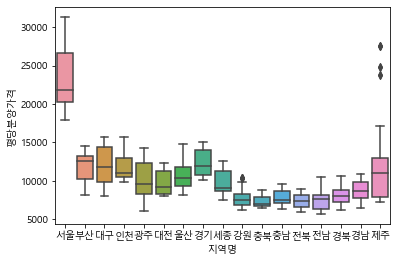

In [57]:
_ = sns.boxplot(data=df, x="지역명", y="평당분양가격")

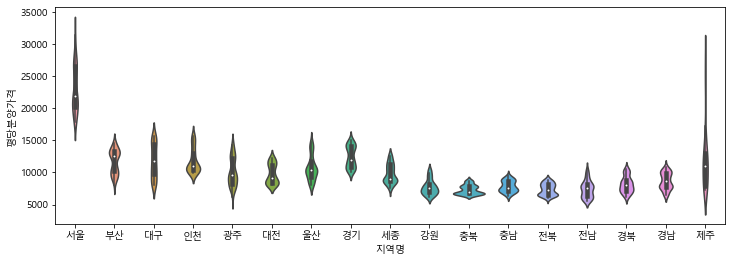

In [63]:
plt.figure(figsize=(12, 4))
_ = sns.violinplot(data=df, x="지역명", y="평당분양가격")

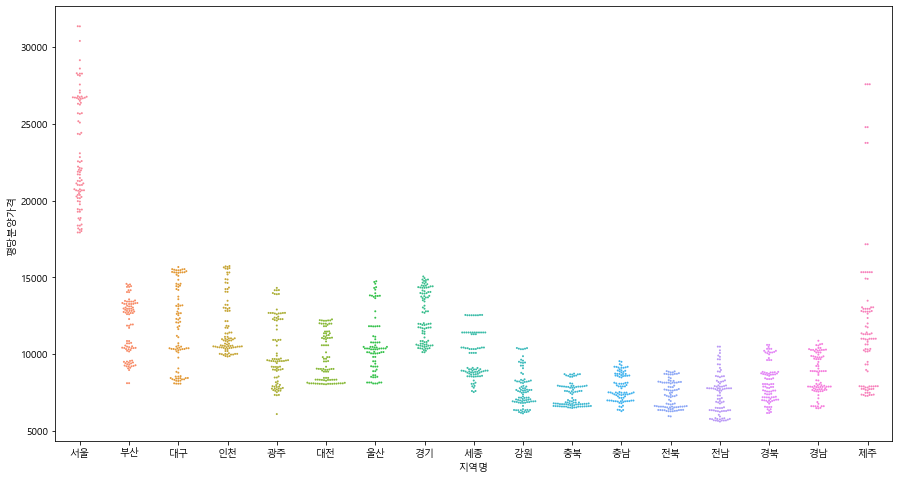

In [65]:
plt.figure(figsize=(15, 8))
_ = sns.swarmplot(data=df, x="지역명", y="평당분양가격", size=2)

### 8. 데이터 집계
#### 지역별 분양가격 평균

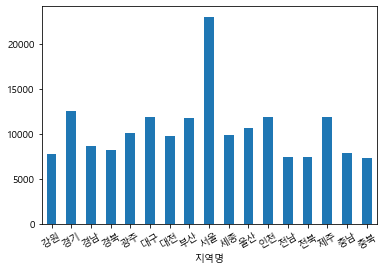

In [46]:
_ = df.groupby("지역명")["평당분양가격"].mean().plot(kind="bar", rot=30)

#### 연도별 지역별 평당 분양가격 평균

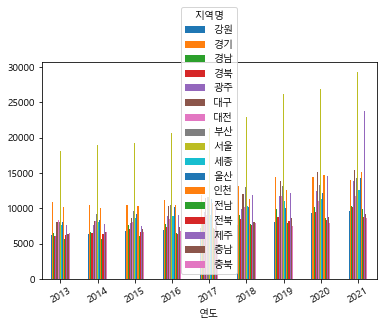

In [47]:
_ = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().plot.bar(rot=30)

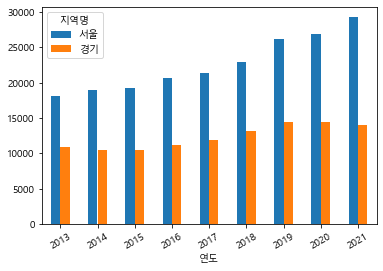

In [48]:
_ = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack()[["서울", "경기"]].plot(kind="bar", rot=30)